First Problem - Exercise Recognition

In [3]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold
from sklearn.metrics import f1_score, confusion_matrix

import xgboost as xgb

In [4]:
X_train = joblib.load("Data/Xtrain1.pkl")
Y_train = np.load('Data/Ytrain1.npy')
print(X_train.shape)
print(Y_train.shape)

(700, 2)
(700,)


In [5]:
print(X_train)

     Patient_Id                                  Skeleton_Features
158           8  [0.01672805172463768, -0.5662699523188407, 0.0...
500          12  [0.03123780159177354, -0.5718956396, 0.0479631...
396           6  [0.023674554394231464, -0.5588386275217391, 0....
155           8  [0.009414516641025642, -0.5693782186153847, 0....
321           3  [0.015847331331651126, -0.5660038876666666, 0....
..          ...                                                ...
71            4  [0.00865563444, -0.5576752849466667, 0.0242797...
106           6  [0.017996815525, -0.5546415622, 0.032668157291...
270          14  [-0.06093925460784313, -0.5421445670294118, -0...
435           8  [-0.009460545267441861, -0.5828924643604652, 0...
102           6  [0.014680226106557379, -0.5484173288196722, 0....

[700 rows x 2 columns]


In [6]:
patient_ids = X_train["Patient_Id"].values
X_train = np.vstack(X_train["Skeleton_Features"].values)

In [7]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)  
print("patient_ids shape:", patient_ids.shape) 

X_train shape: (700, 132)
Y_train shape: (700,)
patient_ids shape: (700,)


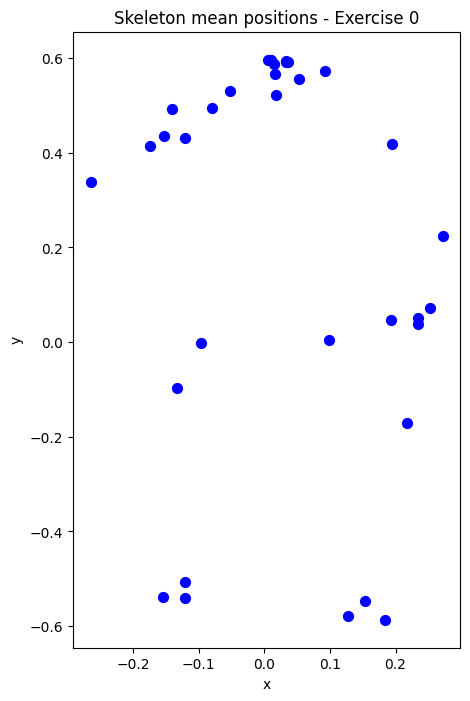

In [11]:
sample = X_train[0]

# Split into mean and std
mean_coords = sample[:66]
std_coords = sample[66:]

# Extract x and y of 33 keypoints
x = mean_coords[0::2]  # even indices
y = mean_coords[1::2]  # odd indices

# Flip y-axis if needed (image coordinates)
plt.figure(figsize=(5, 8))
plt.scatter(x, -y, c='blue', s=50)  # plot keypoints
plt.title("Skeleton mean positions - Exercise 0")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [ ]:
# Plot std as circle size
x_std = std_coords[0::2]
y_std = std_coords[1::2]

plt.figure(figsize=(5,8))
plt.scatter(x, -y, s=500*x_std, c='red', alpha=0.5)  # bigger circle = more movement
plt.title("Skeleton mean positions with movement (std)")
plt.show()


[ mean_x1, mean_y1, mean_x2, mean_y2, ..., mean_x33, mean_y33, 
  std_x1, std_y1, std_x2, std_y2, ..., std_x33, std_y33 ]


In [ ]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", xgb.XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

In [ ]:
gkf = GroupKFold(n_splits=5)
f1_scores = []

for train_idx, val_idx in gkf.split(X_train, Y_train, groups=patient_ids):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = Y_train[train_idx], Y_train[val_idx]
    
    pipeline.fit(X_tr, y_tr)
    y_pred = pipeline.predict(X_val)
    f1 = f1_score(y_val, y_pred, average="macro")
    f1_scores.append(f1)

print("Cross-validation F1 scores:", f1_scores)
print("Mean F1 score:", np.mean(f1_scores))

Cross-validation F1 scores: [0.7348179236237993, 0.7421180910448935, 0.7879464285714285, 0.6693045312081279, 0.8583111944574672]
Mean F1 score: 0.7584996337811433
